<a href="https://colab.research.google.com/github/priyadarshinivr19/Minors-Degree-Machine-Learning/blob/main/FMML_M5L2_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Introduction to Decision Trees**

Importing Libraries

In [14]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

Core Experiment

In [15]:
def performExperiment(trainSet : tuple, testSet : tuple, max_depth : int = None, feature_names : list = None, class_names : list = None, criterion = "gini", min_samples_split : int = 2 , min_samples_leaf = 1):
  clf = tree.DecisionTreeClassifier(max_depth = max_depth, \
                                    criterion = criterion,\
                                    min_samples_split = min_samples_split,\
                                    min_samples_leaf = min_samples_leaf,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
  X_train, y_train = trainSet
  X_test, y_test = testSet

  clf = clf.fit(X_train, y_train)

  y_pred = clf.predict(X_test)

  print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

  print("Here is a diagram of the tree created to evaluate each sample:")
  fig, ax = plt.subplots(figsize=(12,10))
  imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names = feature_names, class_names = class_names, impurity=False, proportion=True, rounded=True, fontsize = 12)
  plt.show()


def giveAnExample(n : int):
  performExperiment((X_train, y_train),  (X_test, y_test), feature_names = iris["feature_names"], class_names = iris["target_names"], max_depth = n)

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  plt.title("Decision Boundary for two features used in Decision Tree")
  plt.show()

Loading the Dataset

In [16]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
irisData = pandas.DataFrame(\
    data = np.hstack((X,y.reshape(y.shape[0], 1), [[iris["target_names"][int(classIdx)]] for classIdx in y])), \
    columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', "Class", "ClassName"])
irisData.sample(n = 10, random_state = 1)

,sepal_length,sepal_width,petal_length,petal_width,Class,ClassName
14,5.8,4.0,1.2,0.2,0,setosa
98,5.1,2.5,3.0,1.1,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
16,5.4,3.9,1.3,0.4,0,setosa
131,7.9,3.8,6.4,2.0,2,virginica
56,6.3,3.3,4.7,1.6,1,versicolor
141,6.9,3.1,5.1,2.3,2,virginica
44,5.1,3.8,1.9,0.4,0,setosa
29,4.7,3.2,1.6,0.2,0,setosa
120,6.9,3.2,5.7,2.3,2,virginica


Accuracy of the decision tree on the test set: 

0.895


Here is a diagram of the tree created to evaluate each sample:


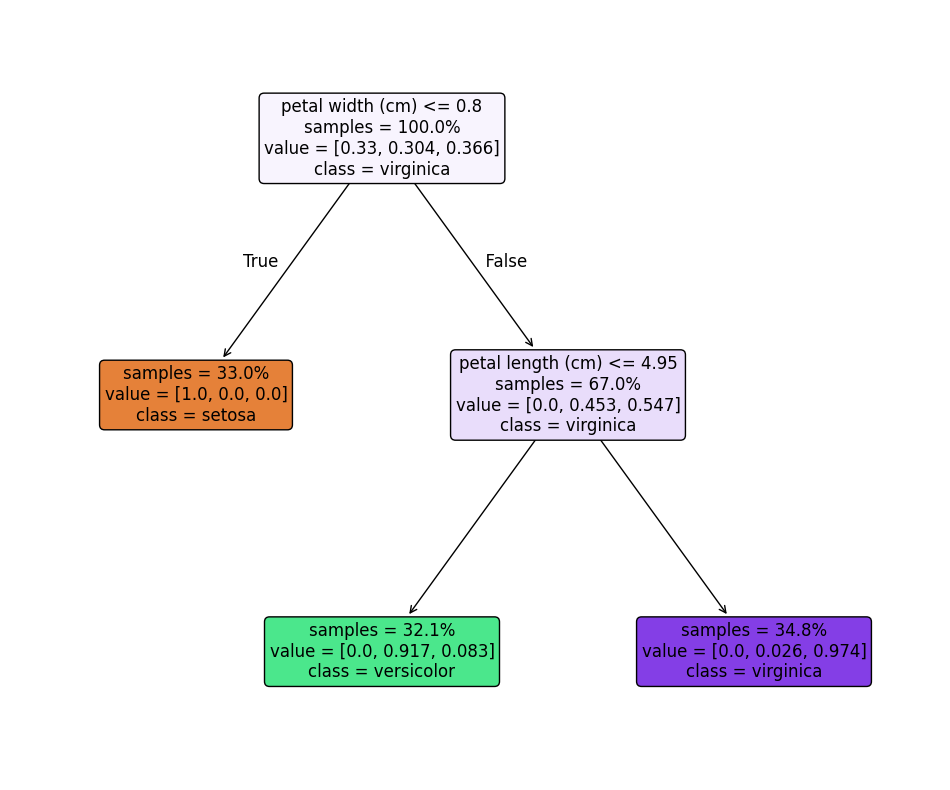

In [17]:
giveAnExample(2)

Task 1

In [18]:
# Sample 5 data points
sample_data = irisData.sample(n=5, random_state=0)

# Extract features and actual classes
X_sample = sample_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_actual = sample_data["Class"].astype(int).values  # Convert actual classes to integers

# Predict using the trained classifier
clf = tree.DecisionTreeClassifier(max_depth = 2, \
                                    criterion = "gini",\
                                    min_samples_split = 2 ,\
                                    min_samples_leaf = 1,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
clf = clf.fit(X_train, y_train)
y_predicted = clf.predict(X_sample)

# Print predictions vs actual
sample_data['Predicted_Class'] = y_predicted
print(sample_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'ClassName', 'Predicted_Class']])

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_predicted)
print(f"Accuracy over these 5 samples: {accuracy * 100:.2f}%")


    sepal_length sepal_width petal_length petal_width   ClassName  \
114          5.8         2.8          5.1         2.4   virginica   
62           6.0         2.2          4.0         1.0  versicolor   
33           5.5         4.2          1.4         0.2      setosa   
107          7.3         2.9          6.3         1.8   virginica   
7            5.0         3.4          1.5         0.2      setosa   

     Predicted_Class  
114                2  
62                 1  
33                 0  
107                2  
7                  0  
Accuracy over these 5 samples: 100.00%


Accuracy of the decision tree on the test set: 

0.974


Here is a diagram of the tree created to evaluate each sample:


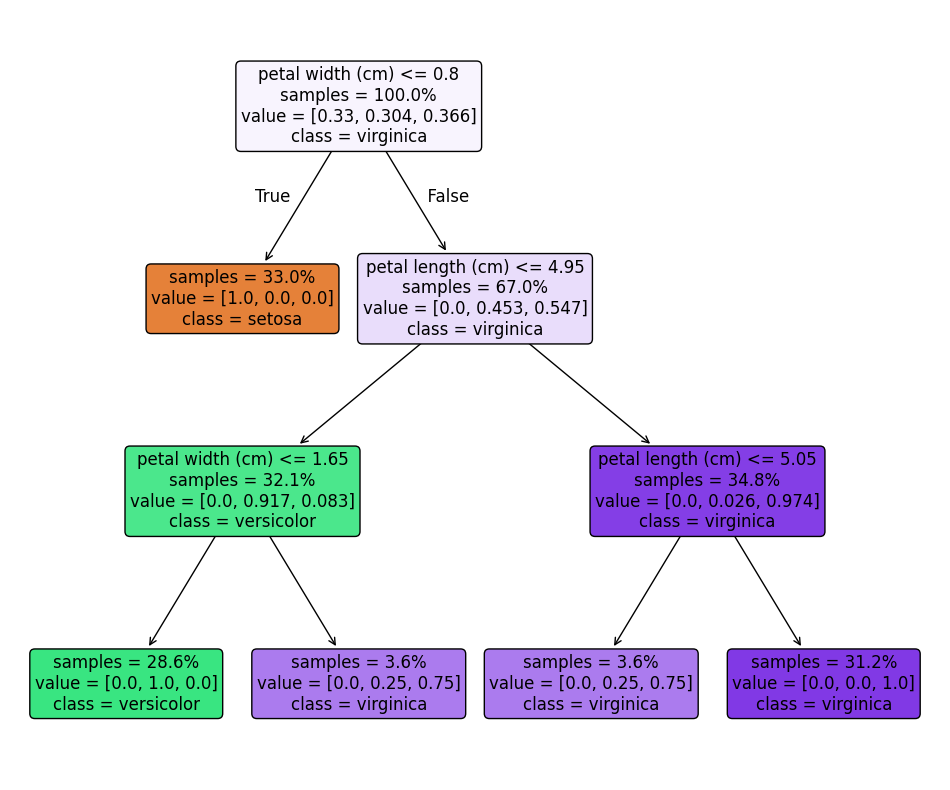

In [19]:
giveAnExample(3)

Task 2

In [20]:
# Sample 5 data points
sample_data = irisData.sample(n=5, random_state=0)

# Extract features and actual classes
X_sample = sample_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y_actual = sample_data["Class"].astype(int).values  # Convert actual classes to integers

# Predict using the trained classifier
clf = tree.DecisionTreeClassifier(max_depth = 3, \
                                    criterion = "gini",\
                                    min_samples_split = 2 ,\
                                    min_samples_leaf = 1,\
                                    splitter = "best",\
                                    random_state = 0,\
                                    )
clf = clf.fit(X_train, y_train)
y_predicted = clf.predict(X_sample)

# Print predictions vs actual
sample_data['Predicted_Class'] = y_predicted
print(sample_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'ClassName', 'Predicted_Class']])

# Calculate accuracy
accuracy = accuracy_score(y_actual, y_predicted)
print(f"Accuracy over these 5 samples: {accuracy * 100:.2f}%")

    sepal_length sepal_width petal_length petal_width   ClassName  \
114          5.8         2.8          5.1         2.4   virginica   
62           6.0         2.2          4.0         1.0  versicolor   
33           5.5         4.2          1.4         0.2      setosa   
107          7.3         2.9          6.3         1.8   virginica   
7            5.0         3.4          1.5         0.2      setosa   

     Predicted_Class  
114                2  
62                 1  
33                 0  
107                2  
7                  0  
Accuracy over these 5 samples: 100.00%


Decision Boundary using Petal Length and Width

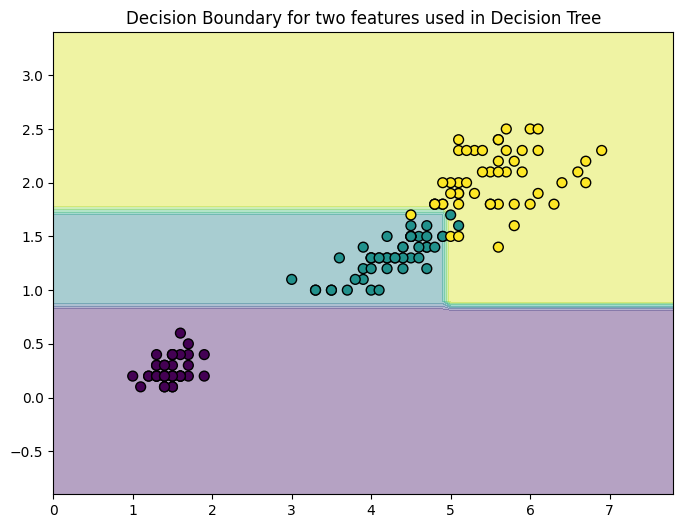

In [21]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [2, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [2, 3], clf)

Decision Boundary using Sepal Length and Width

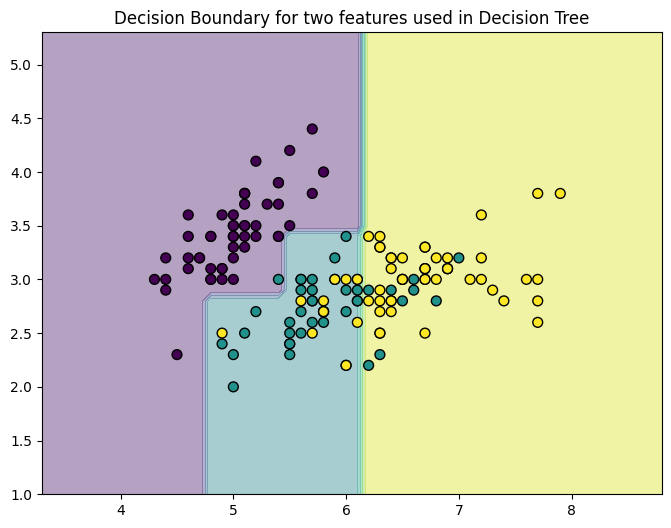

In [22]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Decision Boundary using Petal and Sepal Length

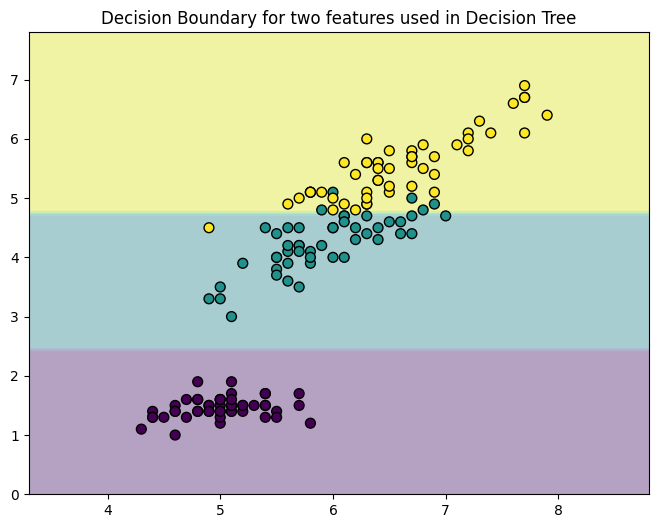

In [23]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [0, 2]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Decision boundary using Sepal and Petal Width

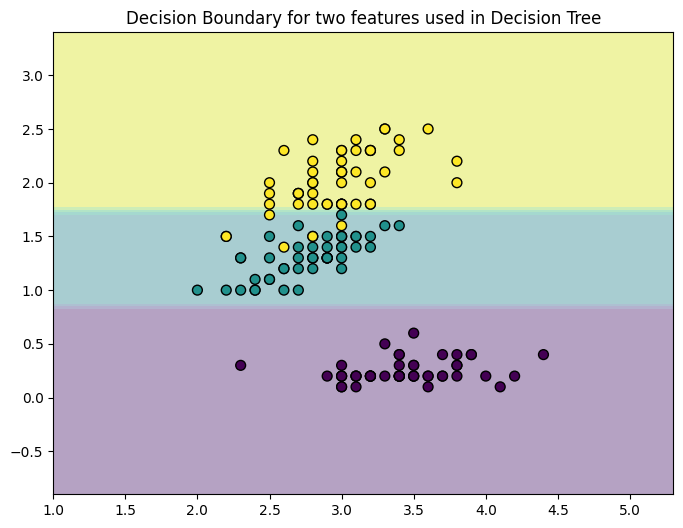

In [24]:
clf = tree.DecisionTreeClassifier(random_state = 0, max_depth = 3)
pair = [1, 3]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, pair, clf)

Task 3

3.1

We see that the above decision boundaries are with depth of 3. Compare the above boundary with trees that have higher complexity (by changing the value of max_depth) and report your observations. also compare the accuracies for different values of max_depth

Test with max_depth of the following values:

2
5
8
10

<Figure size 600x400 with 0 Axes>

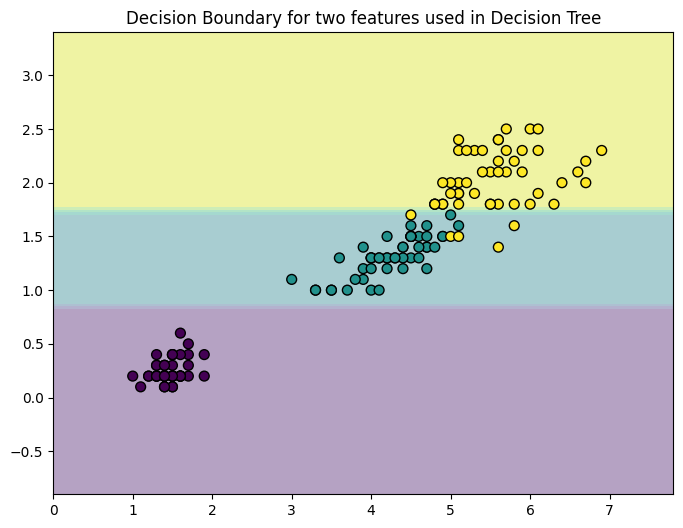

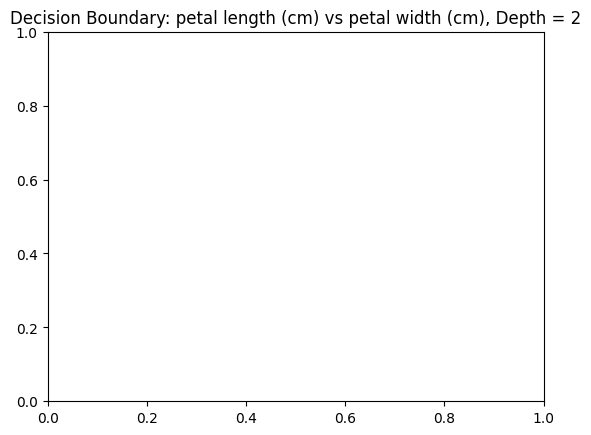

<Figure size 600x400 with 0 Axes>

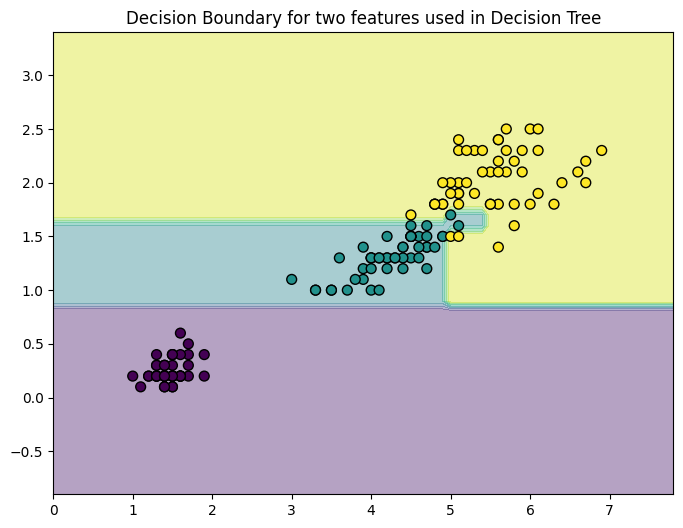

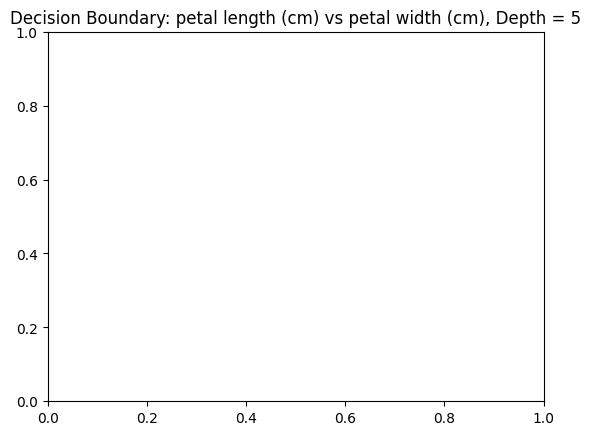

<Figure size 600x400 with 0 Axes>

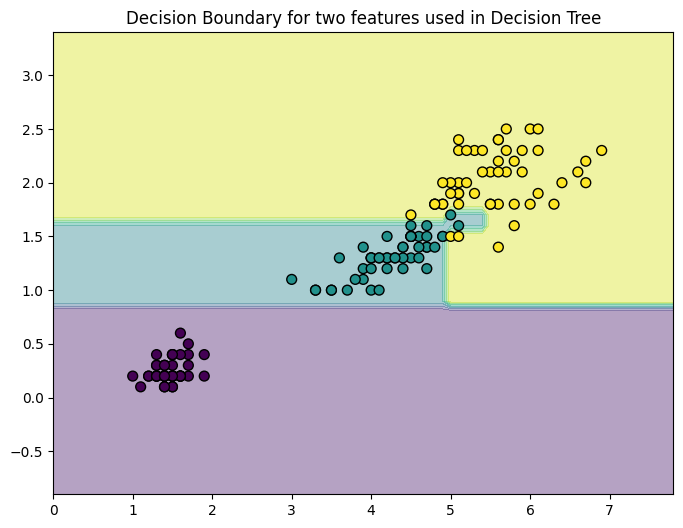

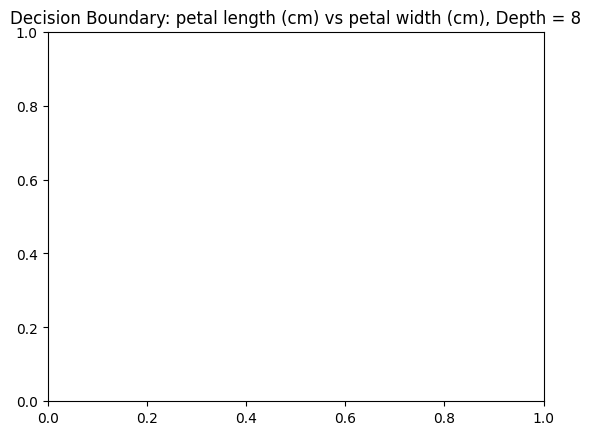

<Figure size 600x400 with 0 Axes>

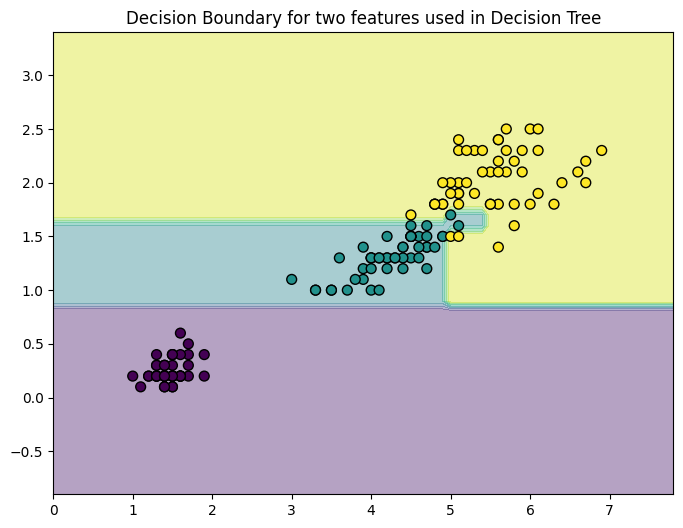

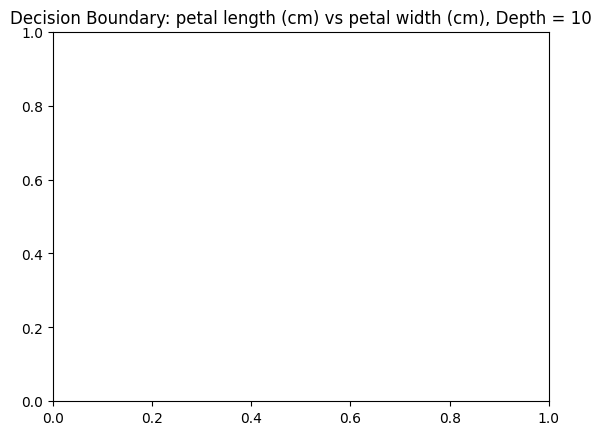

<Figure size 600x400 with 0 Axes>

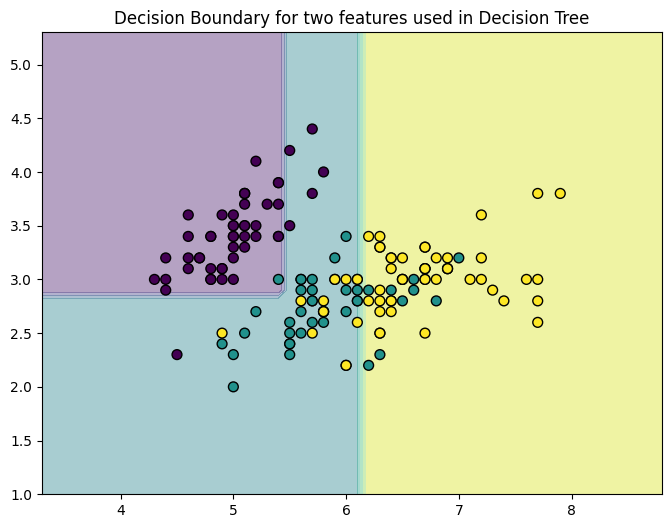

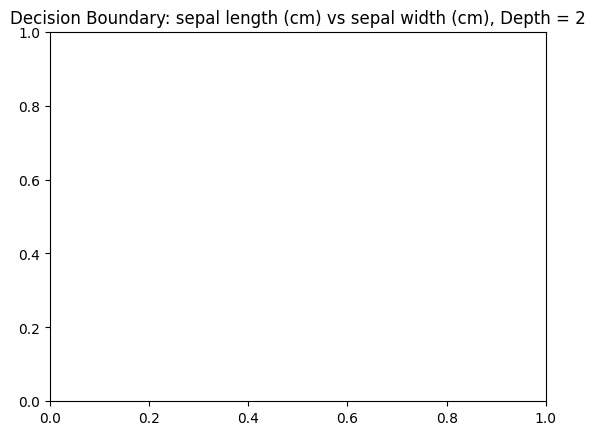

<Figure size 600x400 with 0 Axes>

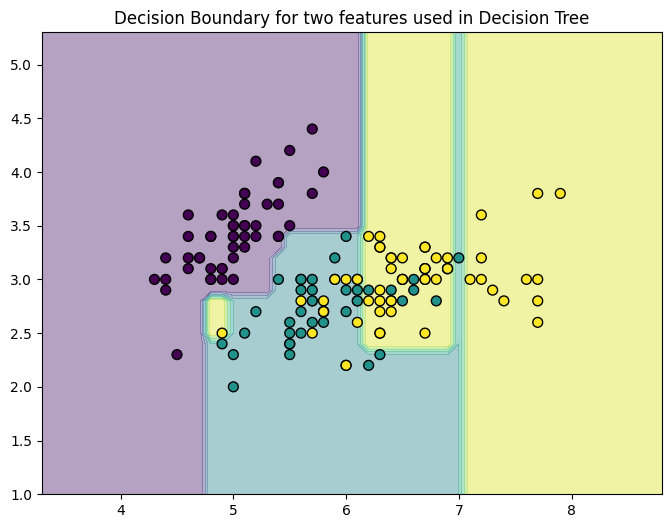

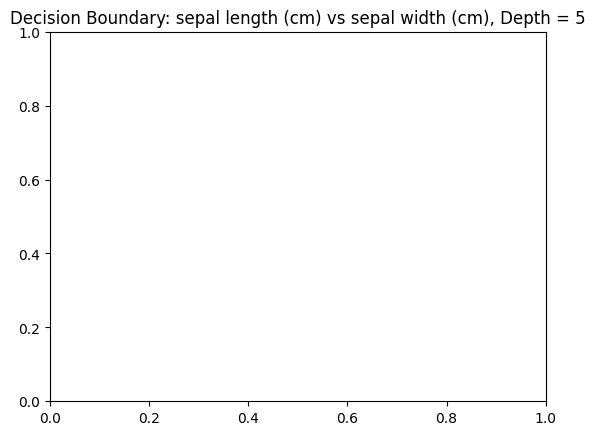

<Figure size 600x400 with 0 Axes>

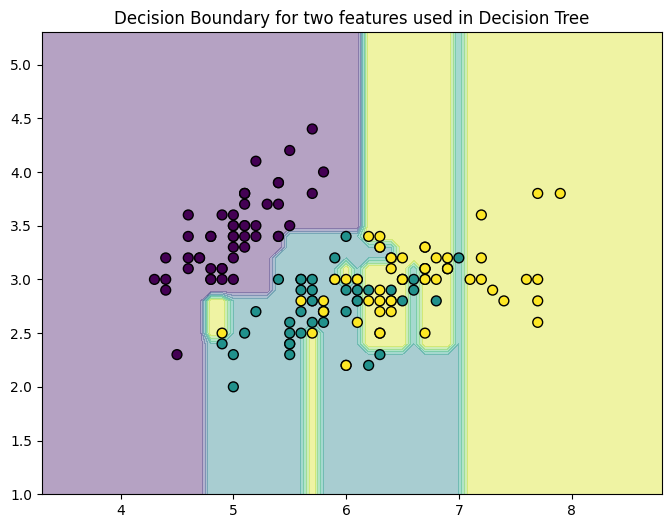

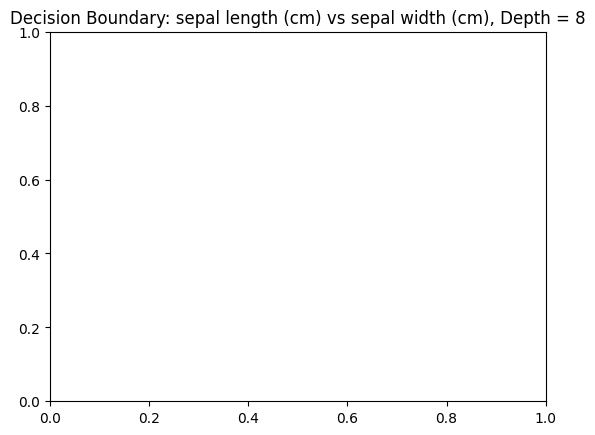

<Figure size 600x400 with 0 Axes>

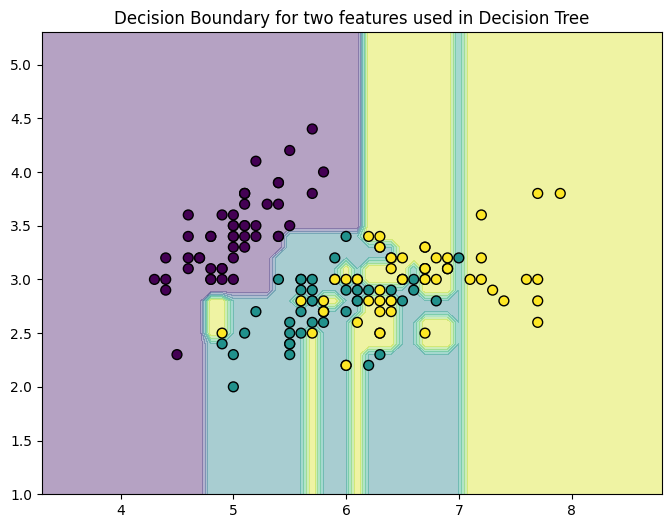

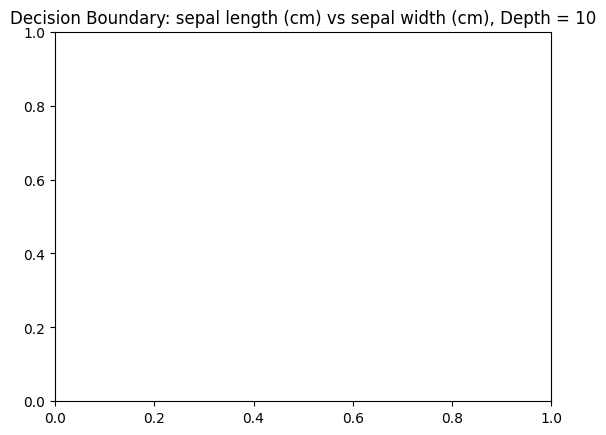

<Figure size 600x400 with 0 Axes>

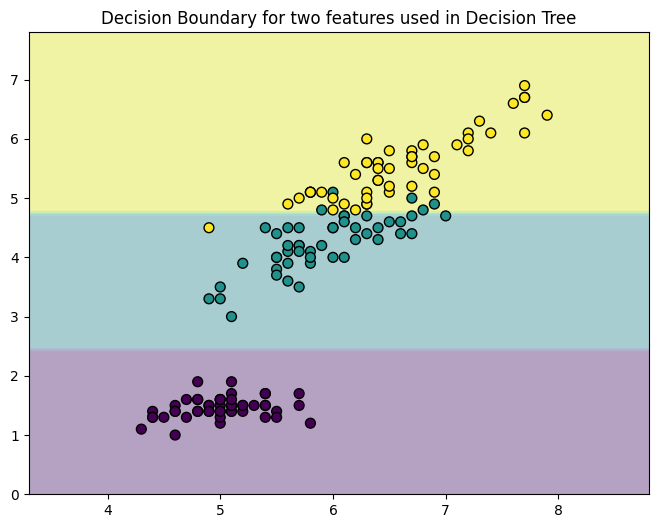

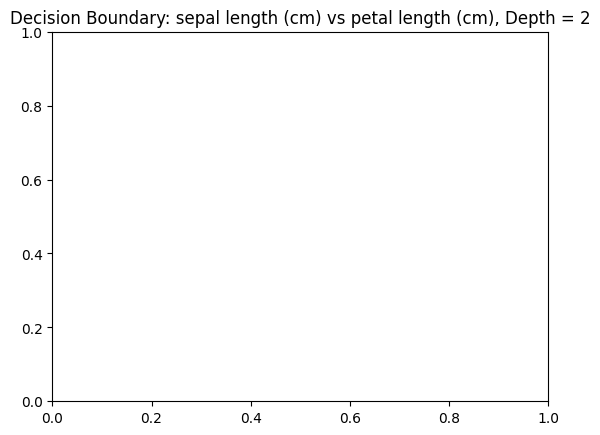

<Figure size 600x400 with 0 Axes>

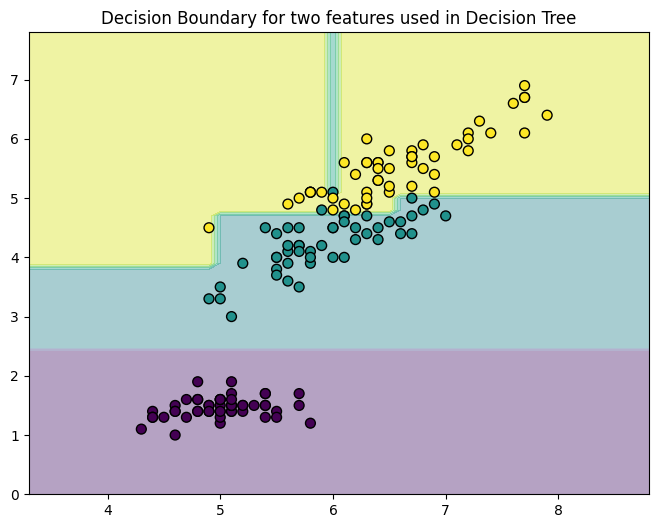

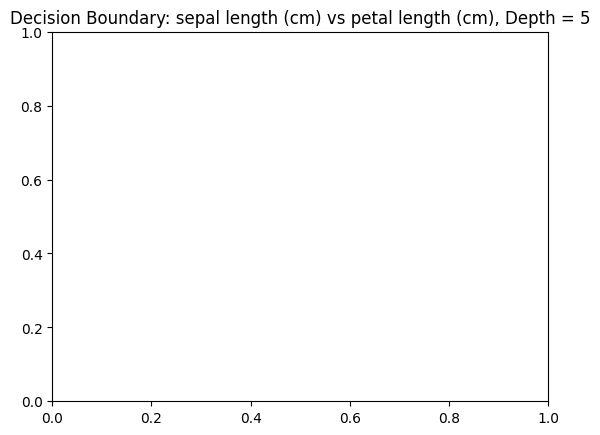

<Figure size 600x400 with 0 Axes>

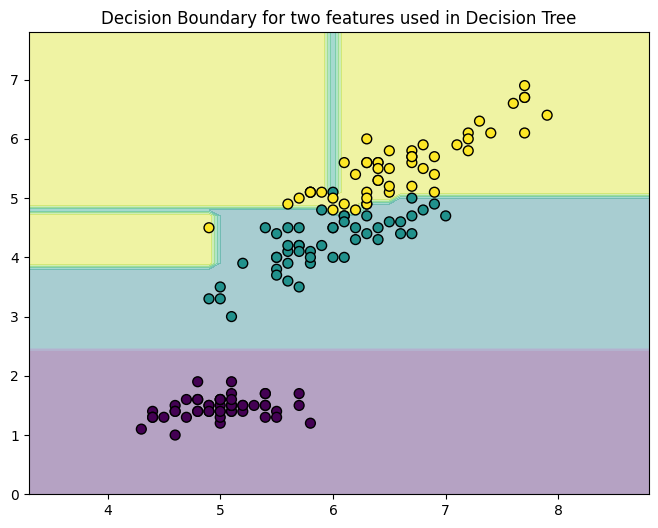

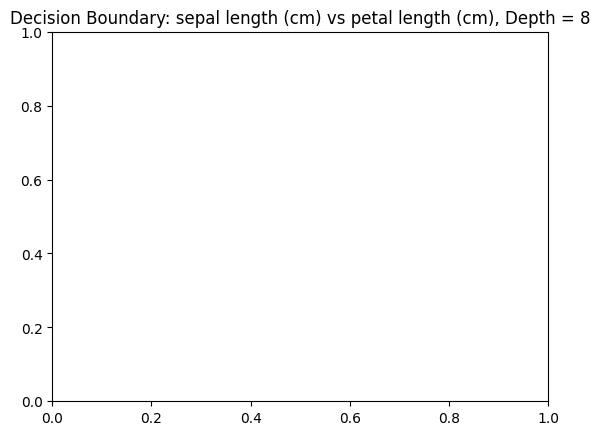

<Figure size 600x400 with 0 Axes>

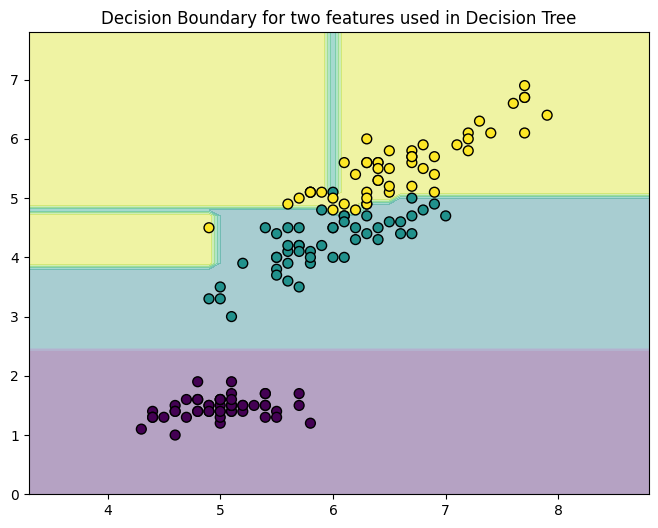

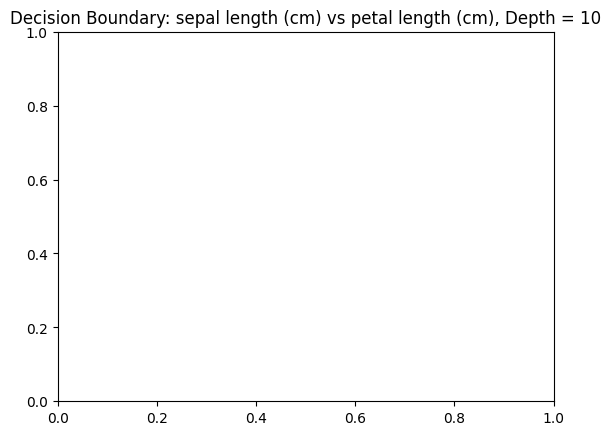

<Figure size 600x400 with 0 Axes>

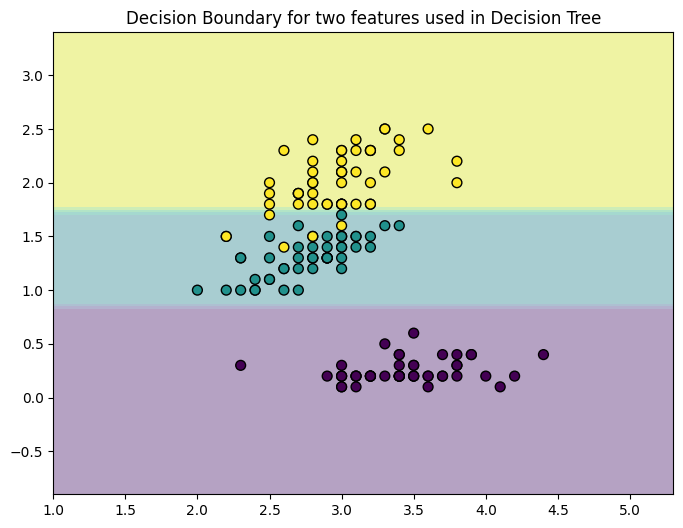

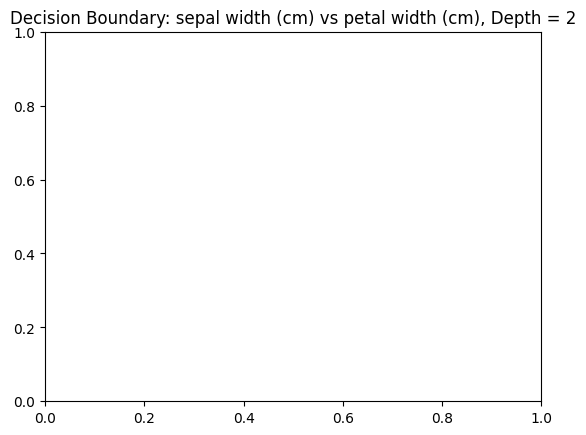

<Figure size 600x400 with 0 Axes>

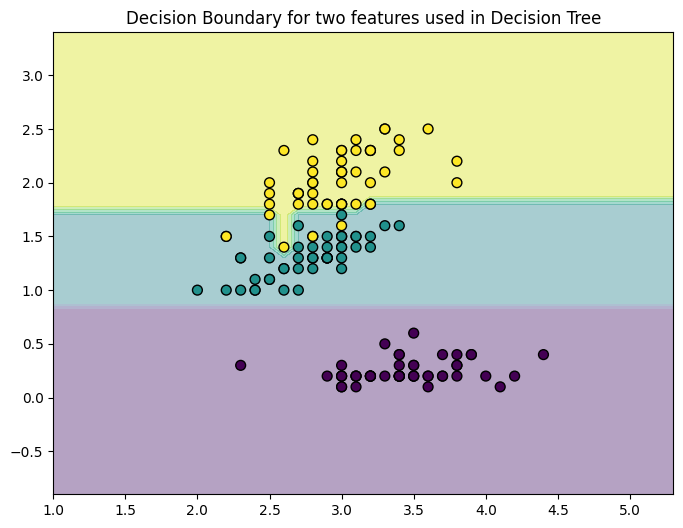

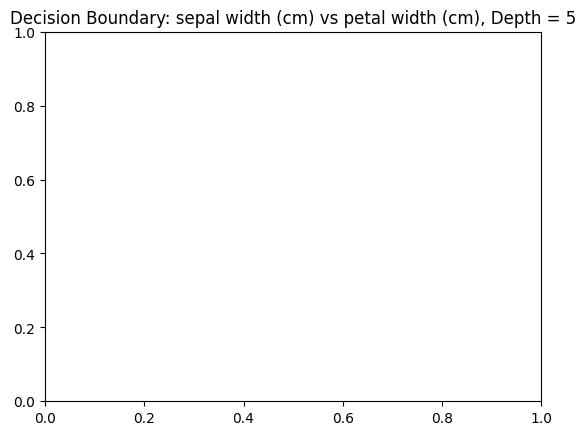

<Figure size 600x400 with 0 Axes>

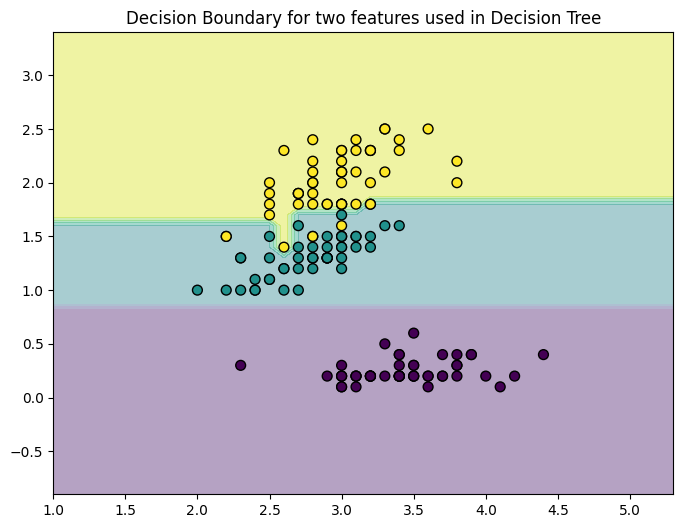

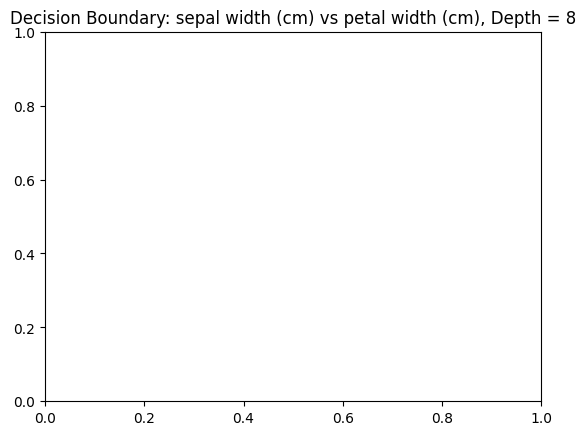

<Figure size 600x400 with 0 Axes>

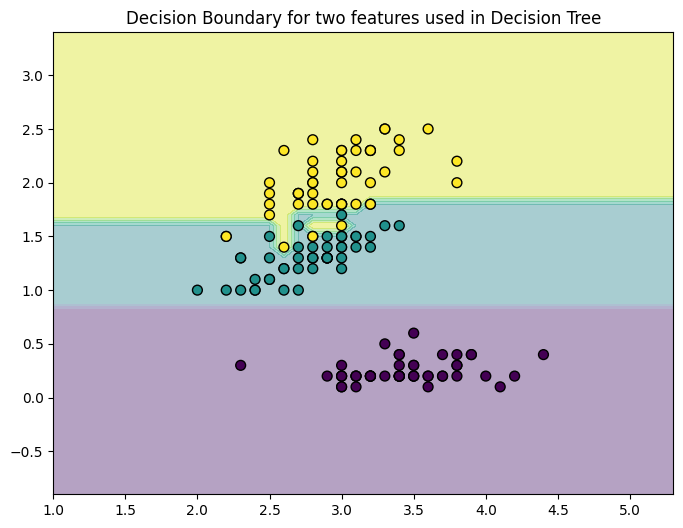

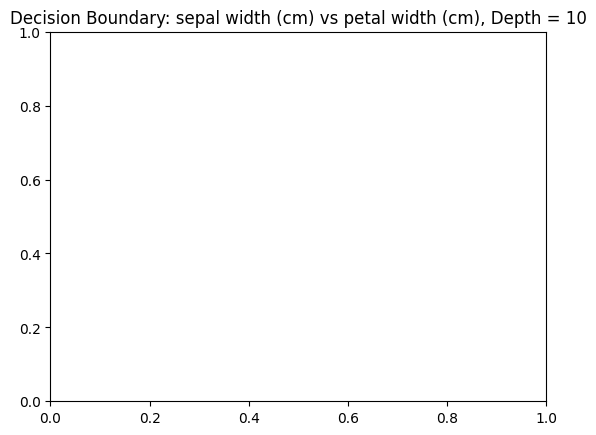

In [26]:
# Feature pairs to evaluate
feature_pairs = [
    [2, 3],  # Petal Length and Width
    [0, 1],  # Sepal Length and Width
    [0, 2],  # Petal and Sepal Length
    [1, 3],  # Sepal and Petal Width
]

# Max depths to test
max_depths = [2, 5, 8, 10]

# Generate decision boundaries for all combinations
for pair in feature_pairs:
    X_pair = X[:, pair]  # Extract the feature pair
    for depth in max_depths:
        # Train the classifier
        clf = tree.DecisionTreeClassifier(random_state=0, max_depth=depth)
        clf.fit(X_pair, y)

        # Plot the decision boundary
        plt.figure(figsize=(6, 4))
        plotDecisionBoundary(X, y, pair, clf)
        plt.title(f"Decision Boundary: {iris.feature_names[pair[0]]} vs {iris.feature_names[pair[1]]}, Depth = {depth}")
        plt.show()


3.2

On a closer look, we see that the decision boundaries' lines are always at a right angle to the principle axes. Can you reason on why is that the case?
(Hint: How is a decision made at any node?)

Decision boundaries are at right angles to the principal axes because, at each node, the tree splits the data based on a threshold of a single feature, creating axis-aligned boundaries.

Task 4

4.1

Complete the following function predict: which takes in four variables : sepal width, sepal length, petal width, petal length and returns the class of the flower.

In [28]:
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:
    # Decision tree logic based on petal and sepal features
    if petal_width <= 0.8:
        return "Setosa"
    else:
        if petal_length <= 4.75:
            if petal_width <= 1.75:
                return "Versicolor"
            else:
                return "Virginica"
        else:
            return "Virginica"


4.2

Use the decision tree made in Exercise 2 and report the logic using multiple nested if else statements.

In [29]:
def predictSpecies(sepal_width, sepal_length, petal_width, petal_length) -> str:
    # Decision tree logic based on petal and sepal features
    if petal_width <= 0.8:
        return "Setosa"
    else:
        if petal_length <= 4.75:
            if petal_width <= 1.75:
                return "Versicolor"
            else:
                return "Virginica"
        else:
            return "Virginica"


Entropy and Information

In [34]:
sample = irisData.sample(n = 10, random_state = 5)

Task 5

5.1

In [35]:
# Function to calculate entropy
def calculate_entropy(data):
    # Get the class probabilities based on the "Class" column
    target_counts = data["Class"].value_counts()
    probabilities = target_counts / len(data)
    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate and display entropy for the sample
entropy = calculate_entropy(sample)
sample, entropy


(    sepal_length sepal_width petal_length petal_width Class   ClassName
 82           5.8         2.7          3.9         1.2     1  versicolor
 134          6.1         2.6          5.6         1.4     2   virginica
 114          5.8         2.8          5.1         2.4     2   virginica
 42           4.4         3.2          1.3         0.2     0      setosa
 109          7.2         3.6          6.1         2.5     2   virginica
 57           4.9         2.4          3.3         1.0     1  versicolor
 1            4.9         3.0          1.4         0.2     0      setosa
 70           5.9         3.2          4.8         1.8     1  versicolor
 25           5.0         3.0          1.6         0.2     0      setosa
 84           5.4         3.0          4.5         1.5     1  versicolor,
 1.5709505944546684)

Task 6

6.1

Suggest a decision node (if, else) statement which divides the group into two groups.

if petal_width <= 0.8:\
    group_1 = "Setosa"\
else:\
    group_2 = "Versicolor or Virginica"\


6.2

Also compute the Information Gain in that division step.

In [38]:
def calculate_entropy(group):
    target_counts = group["Class"].value_counts()
    probabilities = target_counts / len(group)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(data, feature, threshold):
    # Parent entropy
    parent_entropy = calculate_entropy(data)

    # Split the data
    group_1 = data[data[feature].astype(float) <= threshold]
    group_2 = data[data[feature].astype(float) > threshold]

    # Weighted child entropies
    group_1_entropy = calculate_entropy(group_1)
    group_2_entropy = calculate_entropy(group_2)
    weighted_entropy = (len(group_1) / len(data)) * group_1_entropy + (len(group_2) / len(data)) * group_2_entropy

    # Information Gain
    return parent_entropy - weighted_entropy

# Example: Compute Information Gain for petal_width <= 0.8
info_gain = information_gain(irisData, "petal_width", 0.8)
info_gain



0.9182958340544894

6.3

Compare this with other decision clauses that you can make and intuitively comment on which is better for classification and observe if this has any correlation with the numerical value of Information Gain.

A split with a higher Information Gain is better for classification because it creates purer groups.